# Salaries of Data Professionals in India
**Rafael Mayer** [(linkedin)](http://https://www.linkedin.com/in/rafaelmayer-physicsengineer/)

## **Summary**

#### Salary is always one of the main topics when deciding to change career. In this notebook, I explore a dataset that contains the salaries of data professionals in India. The results show that data scientists earn more than other data professionals, but the salary in India for this career is about one tenth of the average salary in the USA. Moreover, the standard deviation for this career in India is significantly higher than others data professionals, which indicates that progression through the career is more accessible. Finally, I show that data professionals earn about 10% more in Bangalore than in other industrial centers in India.

## Importing libraries
Pandas, numpy, requests, tkinter, seaborn and matplotlib

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/analytics-industry-salaries-2022-india/info.txt
/kaggle/input/analytics-industry-salaries-2022-india/Salary Dataset.csv


In [2]:
import requests
from tkinter import *
import tkinter as tk
from tkinter import ttk

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the DataSet

In [4]:
path = '/kaggle/input/analytics-industry-salaries-2022-india/Salary Dataset.csv'
salaries = pd.read_csv(path)
salaries.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


### Coverting the Salary in Indian Rupee to US dolar and Brazilian Real
Here we use tkinter and request libraries to access today's currencies.

In [5]:
class RealTimeCurrencyConverter():
    def __init__(self,url):
        self.data= requests.get(url).json()
        self.currencies = self.data['rates']

In [6]:
url = 'https://api.exchangerate-api.com/v4/latest/USD'
converter = RealTimeCurrencyConverter(url)

So, to make rupians to Brazilian Real, we transform rupian to dolar and dolar to real

In [7]:
rate = round(converter.currencies['INR']/converter.currencies['BRL'],6)
print("1 Indian rupee is "+str(rate)+" Brazilian Real")

1 Indian rupee is 14.514507 Brazilian Real


We need to split the information from the Salary column to get the currency and the period of worked time

In [8]:
salaries.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [9]:
currency = salaries['Salary'].str[0]
currency.value_counts()

₹    4318
$      19
£       6
A       1
Name: Salary, dtype: int64

It seems most of currencies are in indian rupee. We can neglect for now the other currencies for having an idea of the salary in India.

In [10]:
sal_rup = salaries[currency == '₹']
sal_rup.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [11]:
quant = sal_rup['Salary'].str[1:-3]
quant = quant.str.replace(',','').astype(float)
period = sal_rup['Salary'].str[-2:]

quant_period = pd.DataFrame(index = sal_rup.index)

quant_period["Quantanty"] = quant
quant_period['Period'] = period

In [12]:
quant_period.head()

,Quantanty,Period
0,648573.0,yr
1,1191950.0,yr
2,836874.0,yr
3,669578.0,yr
4,944110.0,yr


In [13]:
def currency_per_month(row,rate):
    if row.Period == "yr":
        return row.Quantanty*rate/12
    elif row.Period == "mo":
        return row.Quantanty*rate
    elif row.Period == "hr":
        return row.Quantanty*rate*200
    else:
        print("Not existing Period!")

In [14]:
BRL_rate = round(converter.currencies['BRL']/converter.currencies['INR'],6)
USD_rate = round(1/converter.currencies['INR'],6)

USD_moSal = quant_period.apply(currency_per_month,args=(USD_rate,),axis=1)
BRL_moSal = quant_period.apply(currency_per_month,args=(BRL_rate,),axis=1)

In [15]:
sal_rup.loc[:,'USD/month'] = USD_moSal
sal_rup.loc[:,'BRL/month'] = BRL_moSal

sal_rup.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Company Name,Job Title,Salaries Reported,Location,Salary,USD/month,BRL/month
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",720.240316,3723.727832
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1323.660475,6843.481596
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",929.348577,4804.842332
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",743.566369,3844.326289
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",1048.434155,5420.528889


## Fixing Overlap of Job Titles
For example, 'Data Scientist' is the same as 'Data Science'

In [16]:
sal_rup['Job Title'].value_counts()

Data Scientist                              1832
Data Analyst                                 987
Data Engineer                                798
Machine Learning Engineer                    564
Data Science                                  43
Senior Data Scientist                         39
Junior Data Scientist                         18
Senior Machine Learning Engineer               9
Lead Data Scientist                            6
Software Engineer - Machine Learning           2
Machine Learning Scientist                     2
Machine Learning Data Associate II             2
Machine Learning Consultant                    2
Machine Learning Developer                     2
Data Science Associate                         1
Machine Learning Engineer/Data Scientist       1
Data Science Lead                              1
Machine Learning Data Associate                1
Machine Learning Data Associate I              1
Machine Learning Associate                     1
Data Scientist - Tra

Here we exclude careers which counts are less than 10.

In [17]:
sal = sal_rup.groupby('Job Title').filter(lambda x: len(x) > 10)

In [18]:
sal = sal.replace('Data Science','Data Scientist')
sal = sal.replace('Senior Data Scientist','Data Scientist')
sal = sal.replace('Junior Data Scientist','Data Scientist')

In [19]:
sal['Job Title'].value_counts()

Data Scientist               1932
Data Analyst                  987
Data Engineer                 798
Machine Learning Engineer     564
Name: Job Title, dtype: int64

## Now let's see some data!

Top salaries of data professionals!

In [20]:
sal.sort_values(by='BRL/month',ascending=False).head()

,Company Name,Job Title,Salaries Reported,Location,Salary,USD/month,BRL/month
900,L Brands,Data Scientist,1.0,Bangalore,"₹15,67,329/mo",20886.226254,107984.266113
419,Hashworks,Data Scientist,1.0,Bangalore,"₹13,43,505/mo",17903.547630,92563.463985
574,Société Générale,Data Scientist,1.0,Bangalore,"₹95,68,943/yr",10626.311201,54939.288823
834,Orbinet Technologies,Data Scientist,1.0,Bangalore,"₹7,22,612/mo",9629.527512,49785.798964
653,Ritwik IT Services,Data Scientist,1.0,Bangalore,"₹7,22,247/mo",9624.663522,49760.651559


## Salary in USD vs. Job Title insights
* Data Scientists in India earn more (1k USD/ month) than other data professionals. [(Salary for DS in India)](http://https://www.interviewbit.com/blog/data-scientist-salary/)
* That's one tenth of the [USA salary](http://https://www.datasciencelearner.com/data-scientist-salary/)
* Deviation in Salary is larger for data scientists, which means that career progression is more accessible for this career

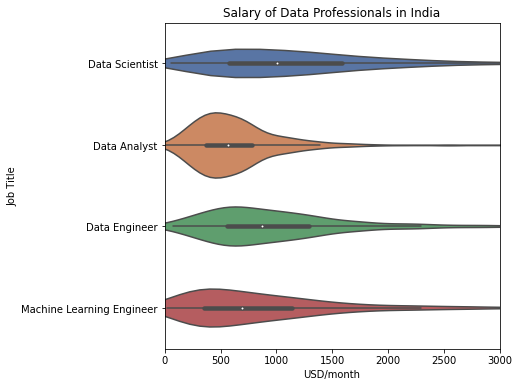

In [21]:
plt.figure(figsize=(6,6))
plt.title("Salary of Data Professionals in India")
sns.set_theme() 
sns.set_style("darkgrid")
sns.violinplot( x="USD/month",y="Job Title", data=sal)
plt.xlim(0,3000)
plt.show()

## Salary in USD vs. Location insights
* DScientists earn about 10% more in Bangalore

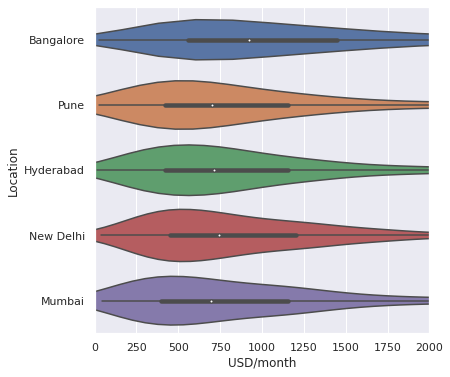

In [22]:
plt.figure(figsize=(6,6))
sns.set_theme() 
sns.set_style("darkgrid")
sns.violinplot(y="Location", x="USD/month", data=sal,size=0.8)
plt.xlim(0,2000)
plt.show()